
### Toronto City Council’s Executive Committee has requested the City Manager seek the public’s input on the establishment of a new casino in Toronto.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
upload=files.upload()



In [ ]:
casino=pd.read_csv('/content/casino_survey_results20130325.csv')
casino.head(10)


,SurveyID,Q1_A,Q1_B1,Q1_B2,Q1_B3,Q2_A,Q2_B,Q3_A,Q3_B,Q3_C,Q3_D,Q3_E,Q3_F,Q3_G,Q3_H,Q3_I,Q3_J,Q3_K,Q3_L,Q3_M,Q3_N,Q3_O,Q3_P,Q3_Q,Q3_Q_Other,Q3_Comments,Q4_A,Q5,Q6,Q6_Comments,Q7_A_StandAlone,Q7_A_Integrated,Q7_A1,Q7_A2,Q7_A3,Q7_A_A,Q7_A_B,Q7_A_C,Q7_A_D,Q7_A_E,...,Q7_B_D,Q7_B_E,Q7_B_F,Q7_B_G,Q7_B_H,Q7_B_I,Q7_B_J,Q7_B_J_Other,Q7_C_StandAlone,Q7_C_Integrated,Q7_C1,Q7_C2,Q7_C3,Q7_C_A,Q7_C_B,Q7_C_C,Q7_C_D,Q7_C_E,Q7_C_F,Q7_C_G,Q7_C_H,Q7_C_I,Q7_C_J,Q7_C_J_Other,Q8_A1,Q8_A2,Q8_B1,Q8_B2,Q8_B3,Q9,Q9_Considerations,Q10,Q11,Age,Gender,PostalCode,GroupName,DateCreated,Unnamed: 92,Unnamed: 93
0,1,Strongly Opposed,Do not want to promote irresponsible gambling ...,Do not want to promote Toronto as a city based...,Do not think the City of Toronto will manage t...,Does Not Fit My Image At All,As above. Will increase inequality,Not Important At All,Very Important,Not Important At All,Not Important At All,Not Important At All,Not Important At All,Very Important,Very Important,Very Important,Not Important At All,Not Important At All,Very Important,Very Important,Not Important At All,Very Important,Very Important,NaN,NaN,NaN,No,I do not support a new casino under any condit...,Neither,As above.,Strongly Unsuitable,Strongly Unsuitable,NaN,NaN,NaN,T,F,F,F,F,...,F,F,F,F,F,F,F,NaN,Strongly Unsuitable,Strongly Unsuitable,NaN,NaN,NaN,T,F,F,F,F,F,F,F,F,F,NaN,Strongly Unsuitable,Strongly Unsuitable,NaN,NaN,NaN,T,NaN,NaN,Individual,25-34,Male,NaN,NaN,03/01/2013,NaN,0.0
1,2,Strongly in Favour,Economic Development,Jobs,Arts and Culture,Fits Image Perfectly,Cosmopolitan City With Much to Offer Tourists.,Very Important,Very Important,Very Important,Very Important,Very Important,Somewhat Important,Somewhat Important,Somewhat Important,Very Important,Very Important,Somewhat Important,Very Important,Very Important,Very Important,Somewhat Important,Very Important,NaN,NaN,NaN,Yes,$50 million,City of Toronto,We might as well get benefits.,Strongly Unsuitable,Highly Suitable,Creates a destination,More jobs,NaN,F,F,T,T,T,...,T,T,T,T,T,T,F,NaN,Somewhat Unsuitable,Somewhat Unsuitable,Limited transit access for tourists or workers,NaN,NaN,F,F,T,T,T,T,T,T,T,F,NaN,Neutral or Mixed Feelings,Neutral or Mixed Feelings,NaN,NaN,NaN,F,High Green Standards. Unionized workforce.,"Address the social issues that exist, don't bu...",Individual,35-44,Female,M5H,NaN,03/01/2013,NaN,NaN
2,3,Strongly in Favour,There are allready a number of close by casinos,If toronto is not selected then another close ...,NaN,Fits Image Perfectly,Big cities have casinos,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Somewhat Important,Not Important At All,Somewhat Important,Very Important,Very Important,Very Important,Very Important,Very Important,Somewhat Important,Very Important,NaN,NaN,NaN,Yes,I don't know,City of Toronto,Toronto is identifiable. During travels I ofte...,Neutral or Mixed Feelings,Highly Suitable,NaN,NaN,NaN,F,F,T,T,T,...,T,T,T,T,T,T,F,NaN,Neutral or Mixed Feelings,Highly Suitable,NaN,NaN,NaN,F,F,T,T,T,T,T,T,T,F,NaN,Somewhat Suitable,Neutral or Mixed Feelings,NaN,NaN,NaN,F,NaN,NaN,Individual,55-64,Male,m6s,NaN,03/01/2013,NaN,NaN
3,4,Somewhat Opposed,believe casino will decrease quality of life,money not worth the bad reputation that casino...,"evidence from other cities (Thunder Bay, Winds...",Does Not Fit My Image At All,"My image of the City of Toronto is vibrant, wo...",Very Important,Very Important,Somewhat Important,Somewhat Important,Very Important,Somewhat Important,Very Important,Very Important,Very Important,Somewhat Important,Somewhat Important,Somewhat Important,Very Important,Somewhat Important,Somewhat Important,Somewhat Important,NaN,NaN,NaN,No,I do not support a new casino under any condit...,Adjacent Municipality,There may be a place for a casino where it ser...,Strongly Unsuitable,Somewhat Unsuitable,downtown is too vibrant,"would bring too much crime, depressed public h...",revenue would never be worth negative concerns,T,F,T,T

In [ ]:
casino.dtypes

SurveyID         int64
Q1_A            object
Q1_B1           object
Q1_B2           object
Q1_B3           object
                ...   
PostalCode      object
GroupName       object
DateCreated     object
Unnamed: 92    float64
Unnamed: 93    float64
Length: 94, dtype: object

#Observation :
1) Our data is mostly non-numeric data.

2)There is lot of Nan value in our data.

3)It is based on mulitcategorical data

# Removing columns which based on what and why?(Personal Rersponse Questions) 
As they already responsed regarding the following questions hence we know whether they are supporting or not hence removing the why they supporting or not that's another case

Q1.b)What are your main reasons for this rating? ie. 'Q1_B1', 'Q1_B2', 'Q1_B3'<br>
Q2.b)Why? ie. 'Q2_B'<br>
Q6.Why? ie. 'Q6_Comments'<br>
Q7.a)Downtown area:What are your main reasons for this rating? ie.'Q7_A1', 'Q7_A2', 'Q7_A3'<br>
Q7.b)Exhibition Place:What are your main reasons for this rating? ie.'Q7_B1','Q7_B2', 'Q7_B3',<br>
Q7.c)Port Lands:What are your main reasons for this rating? ie.'Q7_C1', 'Q7_C2', 'Q7_C3'<br>
Q8.)Woodbine Racetrack:What are your main reasons for this rating? ie.'Q8_B1','Q8_B2', 'Q8_B3'<br>

In [ ]:
casino.drop(['Q1_B1', 'Q1_B2', 'Q1_B3','Q2_B','Q7_A1', 'Q7_A2', 'Q7_A3','Q7_B1','Q7_B2', 'Q7_B3',
            'Q7_C1', 'Q7_C2', 'Q7_C3','Q8_B1','Q8_B2', 'Q8_B3'],axis=1,inplace = True)  
casino.drop(['Q9_Considerations'],axis=1,inplace = True)  
casino.drop(['Q10','Unnamed: 92', 'Unnamed: 93','Q7_C_J_Other','Q7_B_J_Other','Q7_A_J_Other','Q3_Q_Other'],axis=1,inplace = True)  
casino.drop(['GroupName', 'DateCreated','PostalCode','Q6_Comments','Q3_Comments'],axis=1,inplace = True)  
casino.drop(['SurveyID'],axis=1,inplace = True)          #Removing Survey ID(Serial Number)
casino.shape

(17766, 64)

#Is there any missing values in the columns ?

Except few columns there are missing values in our dataset .

zero means there are no missing values.

In [ ]:
print('Displaying All The Missing Values:')
for i in range(len(casino.columns)):           
    if casino[casino.columns[i]].isnull().sum()!=0:
        print(casino.columns[i],'=',casino[casino.columns[i]].isnull().sum())

Displaying All The Missing Values:
Q1_A = 1
Q2_A = 315
Q3_A = 3307
Q3_B = 3329
Q3_C = 3415
Q3_D = 3562
Q3_E = 3291
Q3_F = 3606
Q3_G = 2567
Q3_H = 2594
Q3_I = 3023
Q3_J = 3511
Q3_K = 3610
Q3_L = 3354
Q3_M = 3324
Q3_N = 3520
Q3_O = 2899
Q3_P = 3671
Q3_Q = 14804
Q4_A = 490
Q5 = 540
Q6 = 590
Q7_A_StandAlone = 1966
Q7_A_Integrated = 1453
Q7_B_StandAlone = 2419
Q7_B_Integrated = 1958
Q7_C_StandAlone = 2658
Q7_C_Integrated = 2353
Q8_A1 = 3288
Q8_A2 = 2573
Age = 673
Gender = 785


# Case1:What if I Remove all the missing values in columns?

Without any treatment only removing all the rows has missing values



In [ ]:
casino.dropna(inplace=True)                   #Removing all rows whose having missing values

In [ ]:
casino.shape                                             #original=(17766, 94)

(1827, 64)

#Conclusion:#
There is lots data has been gone more than 50percent of data we lost and making a molde on basis of data is not good idead

In [ ]:
casino.describe()

,Q1_A,Q2_A,Q3_A,Q3_B,Q3_C,Q3_D,Q3_E,Q3_F,Q3_G,Q3_H,Q3_I,Q3_J,Q3_K,Q3_L,Q3_M,Q3_N,Q3_O,Q3_P,Q3_Q,Q4_A,Q5,Q6,Q7_A_StandAlone,Q7_A_Integrated,Q7_A_A,Q7_A_B,Q7_A_C,Q7_A_D,Q7_A_E,Q7_A_F,Q7_A_G,Q7_A_H,Q7_A_I,Q7_A_J,Q7_B_StandAlone,Q7_B_Integrated,Q7_B_A,Q7_B_B,Q7_B_C,Q7_B_D,Q7_B_E,Q7_B_F,Q7_B_G,Q7_B_H,Q7_B_I,Q7_B_J,Q7_C_StandAlone,Q7_C_Integrated,Q7_C_A,Q7_C_B,Q7_C_C,Q7_C_D,Q7_C_E,Q7_C_F,Q7_C_G,Q7_C_H,Q7_C_I,Q7_C_J,Q8_A1,Q8_A2,Q9,Q11,Age,Gender
count,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827,1827
unique,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,6,3,5,5,2,2,2,2,2,2,2,2,2,2,5,5,2,2,2,2,2,2,2,2,2,2,5,5,2,2,2,2,2,2,2,2,2,2,5,5,2,3,9,5
top,Strongly Opposed,Does Not Fit My Image At All,Very Important,Very Important,Very Important,Not Important At All,Very Important,Not Important At All,Very Important,Very Important,Very Important,Not Important At All,Not Important At All,Very Important,Very Important,Not Important At All,Very Important,Not Important At All,Very Important,No,I do not support a new casino under any condit...,Neither,Strongly Unsuitable,Strongly Unsuitable,T,F,F,F,F,F,F,F,F,F,Strongly Unsuitable,Strongly Unsuitable,T,F,F,F,F,F,F,F,F,F,Strongly Unsuitable,Strongly Unsuitable,T,F,F,F,F,F,F,F,F,F,Strongly Unsuitable,Strongly Unsuitable,T,Individual,25-34,Male
freq,1323,1370,812,692,687,922,996,975,1235,1264,1104,880,981,730,912,814,1143,789,1116,1307,1245,1075,1442,1284,1265,1678,1245,1031,1234,1442,1067,1202,1070,1538,1369,1172,1183,1639,1253,1072,1235,1436,1087,1243,1155,1570,1404,1249,1194,1673,1390,1177,1331,1468,1180,1275,1253,1577,616,823,1162,1706,416,928


From here onward we will see the feedback form questions and there pi-chart which will give idea immediately about data pattern

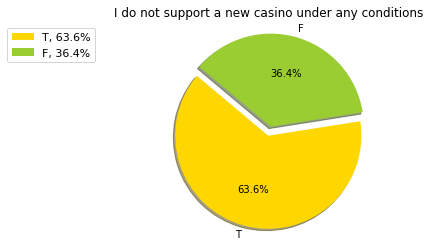

ValueError: ignored

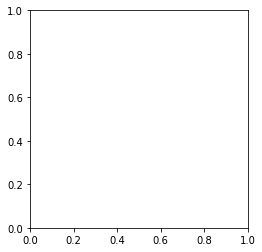

In [ ]:
import matplotlib.pyplot as plt

areab=['Q9', 'Q11']

place=['I do not support a new casino under any conditions','Personal Info']

# Data to plot
for j in range(len(areab)):
    labels = [casino[areab[j]].unique()[i] for i in range(len(casino[areab[j]].unique()))]
    sizes = [casino[areab[j]].value_counts()[i] for i in range(len(casino[areab[j]].unique()))]
    
    colors = ['gold', 'yellowgreen']
    explode = (0.1, 0)  # explode 1st slice
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140,)
    plt.axis('equal')
    total = sum(sizes)
    print()
    plt.title(place[j])
    plt.legend(
        loc='upper right',
        labels=['%s, %1.1f%%' % (
            l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
        prop={'size': 11},
        bbox_to_anchor=(0.0, 1),
        )
    plt.show()


#Case 2:
After Processing the data

#Missing Value Treatment
As the each  variable  contains lots of missing we value we will see the treatment of each variable

#Q1_A
It contains only one missing value hence replacing with high occured response entry make doesn't any harm

In [ ]:
variable_name='Q1_A'
casino[variable_name]=casino[variable_name].replace(np.NaN,'Strongly Opposed')
casino['Q1_A'].value_counts()

Strongly Opposed             11768
Strongly in Favour            3768
Somewhat Opposed               887
Somewhat in Favour             797
Neutral or Mixed Feelings      546
Name: Q1_A, dtype: int64

#Q2_A

1)As we have 17766 rows we but  we can see there is missing entries

2)By using the crostab we will see the distribution proption  of each entry with respect to their varible with target variable 

3)So that we can treat missing values on basis of their distribution with repsect True and False.

4)This method we will use th treat all variable

In [ ]:
cross_demo=pd.crosstab(casino['Q2_A'], casino['Q9'], margins=True).T
cross_demo

Q2_A,Does Not Fit My Image At All,Fits Image Perfectly,Fits Image Somewhat,Neutral / I am Not Sure,All
Q9,,,,,
F,2563,3516,939,624,7642
T,9616,32,21,140,9809
All,12179,3548,960,764,17451


In [ ]:
variable_name='Q2_A'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)
print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo

print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[0])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Does Not Fit My Image At All     12179
Fits Image Perfectly              3548
Fits Image Somewhat                960
Neutral / I am Not Sure            764
Name: Q2_A, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
315
All true value:  7642
All false value:  9809
--------------------------------------------------------------------------
All Avaiable True for missing values:  138.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  177.0
--------------------------------------------------------------------------
Does Not Fit My Image At All  : 59.0
Fits Image Perfectly : 81.0
Fits Image Somewhat : 22.0
Neutral / I am Not Sure : 14.0
--------------------------------------------------------------------------
Does Not Fit My Image At All  : 135.0
Fits Image Perfectly : 0.0
Fits Image Somewhat : 0.0
Neutral / I am Not Sure : 2.0
---------------------------------------

Q2_A,Does Not Fit My Image At All,Fits Image Perfectly,Fits Image Somewhat,Neutral / I am Not Sure,All
Q9,,,,,
F,2563,3516,939,624,7642
T,9616,32,21,140,9809
All,12179,3548,960,764,17451


#Q3_A

In [ ]:
variable_name='Q3_A'
#variable_name='Q8_A1'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[3])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Very Important          8294
Not Important At All    2856
Somewhat Important      2634
Unsure                   675
Name: Q3_A, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3307
All true value:  6984
All false value:  7475
--------------------------------------------------------------------------
All Avaiable True for missing values:  1597.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1710.0
--------------------------------------------------------------------------
Not Important At All : 145.0
Somewhat Important : 378.0
Unsure : 36.0
Very Important : 1152.0
--------------------------------------------------------------------------
Not Important At All : 484.0
Somewhat Important : 233.0
Unsure : 113.0
Very Important : 767.0
--------------------------------------------------------------------------
Very Important          8294
Not Important At All    2856

Q3_A,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,591,1542,147,4704,6984
T,2265,1092,528,3590,7475
All,2856,2634,675,8294,14459


#Q3_B 

In [ ]:
variable_name='Q3_B'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[3])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Very Important          7497
Somewhat Important      3176
Not Important At All    3068
Unsure                   696
Name: Q3_B, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3329
All true value:  7034
All false value:  7403
--------------------------------------------------------------------------
All Avaiable True for missing values:  1622.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1707.0
--------------------------------------------------------------------------
Not Important At All : 154.0
Somewhat Important : 336.0
Unsure : 34.0
Very Important : 1184.0
--------------------------------------------------------------------------
Not Important At All : 534.0
Somewhat Important : 393.0
Unsure : 122.0
Very Important : 574.0
--------------------------------------------------------------------------
Very Important          7497
Somewhat Important      3176

Q3_B,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,633,1384,140,4877,7034
T,2435,1792,556,2620,7403
All,3068,3176,696,7497,14437


#Q3_C

In [ ]:
variable_name='Q3_C'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Very Important          6987
Not Important At All    3625
Somewhat Important      3015
Unsure                   724
Name: Q3_C, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3415
All true value:  6976
All false value:  7375
--------------------------------------------------------------------------
All Avaiable True for missing values:  1660.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1755.0
--------------------------------------------------------------------------
Not Important At All : 192.0
Somewhat Important : 418.0
Unsure : 41.0
Very Important : 1104.0
--------------------------------------------------------------------------
Not Important At All : 644.0
Somewhat Important : 305.0
Unsure : 126.0
Very Important : 585.0
--------------------------------------------------------------------------
Very Important          6987
Not Important At All    3625

Q3_C,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,765,1661,162,4388,6976
T,2860,1354,562,2599,7375
All,3625,3015,724,6987,14351


# Q3_D

In [ ]:
variable_name='Q3_D'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
#casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[3])
#df.fillna(value=cross_demo.keys()[i], limit=1)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[1], limit=71)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[2], limit=79)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[3], limit=681)
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Not Important At All    6042
Somewhat Important      3585
Very Important          3576
Unsure                  1001
Name: Q3_D, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3562
All true value:  6931
All false value:  7273
--------------------------------------------------------------------------
All Avaiable True for missing values:  1738.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1824.0
--------------------------------------------------------------------------
Not Important At All : 472.0
Somewhat Important : 592.0
Unsure : 79.0
Very Important : 681.0
--------------------------------------------------------------------------
Not Important At All : 1015.0
Somewhat Important : 319.0
Unsure : 168.0
Very Important : 236.0
--------------------------------------------------------------------------
Not Important At All    6042
Somewhat Important      3585

Q3_D,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,1795,2248,300,2588,6931
T,4247,1337,701,988,7273
All,6042,3585,1001,3576,14204


#Q3_E

In [ ]:
variable_name='Q3_E'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Very Important          9610
Not Important At All    2134
Somewhat Important      2132
Unsure                   599
Name: Q3_E, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3291
All true value:  6991
All false value:  7484
--------------------------------------------------------------------------
All Avaiable True for missing values:  1589.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1702.0
--------------------------------------------------------------------------
Not Important At All : 131.0
Somewhat Important : 357.0
Unsure : 36.0
Very Important : 1179.0
--------------------------------------------------------------------------
Not Important At All : 339.0
Somewhat Important : 141.0
Unsure : 96.0
Very Important : 1012.0
--------------------------------------------------------------------------
Very Important          9610
Not Important At All    2134

Q3_E,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,537,1466,146,4842,6991
T,1597,666,453,4768,7484
All,2134,2132,599,9610,14475


#Q3_F

In [ ]:
variable_name='Q3_F'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[1], limit=132)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[2], limit=69)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[3], limit=651)

print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Not Important At All    6621
Somewhat Important      3400
Very Important          3198
Unsure                   941
Name: Q3_F, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3606
All true value:  6937
All false value:  7223
--------------------------------------------------------------------------
All Avaiable True for missing values:  1767.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1839.0
--------------------------------------------------------------------------
Not Important At All : 515.0
Somewhat Important : 604.0
Unsure : 69.0
Very Important : 651.0
--------------------------------------------------------------------------
Not Important At All : 1144.0
Somewhat Important : 274.0
Unsure : 167.0
Very Important : 182.0
--------------------------------------------------------------------------
Not Important At All    6621
Somewhat Important      3400

Q3_F,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,1943,2278,260,2456,6937
T,4678,1122,681,742,7223
All,6621,3400,941,3198,14160


#Q3_G

In [ ]:
variable_name='Q3_G'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Very Important          11284
Somewhat Important       1860
Not Important At All     1679
Unsure                    376
Name: Q3_G, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
2567
All true value:  7085
All false value:  8114
--------------------------------------------------------------------------
All Avaiable True for missing values:  1197.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1370.0
--------------------------------------------------------------------------
Not Important At All : 241.0
Somewhat Important : 333.0
Unsure : 39.0
Very Important : 757.0
--------------------------------------------------------------------------
Not Important At All : 64.0
Somewhat Important : 20.0
Unsure : 26.0
Very Important : 1087.0
--------------------------------------------------------------------------
Very Important          11284
Somewhat Important       1

Q3_G,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,1244,1723,201,3917,7085
T,435,137,175,7367,8114
All,1679,1860,376,11284,15199


#Q3_H

In [ ]:
variable_name='Q3_H'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Very Important          11586
Somewhat Important       1815
Not Important At All     1465
Unsure                    306
Name: Q3_H, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
2594
All true value:  7086
All false value:  8086
--------------------------------------------------------------------------
All Avaiable True for missing values:  1212.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1382.0
--------------------------------------------------------------------------
Not Important At All : 203.0
Somewhat Important : 325.0
Unsure : 27.0
Very Important : 828.0
--------------------------------------------------------------------------
Not Important At All : 64.0
Somewhat Important : 22.0
Unsure : 25.0
Very Important : 1101.0
--------------------------------------------------------------------------
Very Important          11586
Somewhat Important       1

Q3_H,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,1040,1665,138,4243,7086
T,425,150,168,7343,8086
All,1465,1815,306,11586,15172


#Q3_I

In [ ]:
variable_name='Q3_I'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Very Important          10145
Somewhat Important       2319
Not Important At All     1785
Unsure                    494
Name: Q3_I, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3023
All true value:  7010
All false value:  7733
--------------------------------------------------------------------------
All Avaiable True for missing values:  1437.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1586.0
--------------------------------------------------------------------------
Not Important At All : 192.0
Somewhat Important : 417.0
Unsure : 38.0
Very Important : 939.0
--------------------------------------------------------------------------
Not Important At All : 174.0
Somewhat Important : 88.0
Unsure : 61.0
Very Important : 1114.0
--------------------------------------------------------------------------
Very Important          10145
Somewhat Important       

Q3_I,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,850,1843,167,4150,7010
T,935,476,327,5995,7733
All,1785,2319,494,10145,14743


#Q3_J

In [ ]:
variable_name='Q3_J'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[1], limit=25)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[2], limit=52)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[3], limit=756)

print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Not Important At All    5767
Very Important          3974
Somewhat Important      3700
Unsure                   814
Name: Q3_J, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3511
All true value:  6962
All false value:  7293
--------------------------------------------------------------------------
All Avaiable True for missing values:  1715.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1796.0
--------------------------------------------------------------------------
Not Important At All : 403.0
Somewhat Important : 584.0
Unsure : 52.0
Very Important : 757.0
--------------------------------------------------------------------------
Not Important At All : 989.0
Somewhat Important : 338.0
Unsure : 144.0
Very Important : 245.0
--------------------------------------------------------------------------
Not Important At All    5767
Very Important          3974


Q3_J,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,1563,2263,202,2934,6962
T,4204,1437,612,1040,7293
All,5767,3700,814,3974,14255


#Q3_K

In [ ]:
variable_name='Q3_K'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break

casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[1], limit=150)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[2], limit=69)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[3], limit=617)

print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Not Important At All    6836
Somewhat Important      3281
Very Important          3142
Unsure                   897
Name: Q3_K, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3610
All true value:  6911
All false value:  7245
--------------------------------------------------------------------------
All Avaiable True for missing values:  1762.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1848.0
--------------------------------------------------------------------------
Not Important At All : 590.0
Somewhat Important : 573.0
Unsure : 69.0
Very Important : 617.0
--------------------------------------------------------------------------
Not Important At All : 1126.0
Somewhat Important : 277.0
Unsure : 155.0
Very Important : 203.0
--------------------------------------------------------------------------
Not Important At All    6836
Somewhat Important      3281

Q3_K,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,2206,2141,258,2306,6911
T,4630,1140,639,836,7245
All,6836,3281,897,3142,14156


#Q3_L

In [ ]:
variable_name='Q3_L'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Very Important          7544
Not Important At All    3225
Somewhat Important      2874
Unsure                   769
Name: Q3_L, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3354
All true value:  7013
All false value:  7399
--------------------------------------------------------------------------
All Avaiable True for missing values:  1632.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1722.0
--------------------------------------------------------------------------
Not Important At All : 133.0
Somewhat Important : 277.0
Unsure : 34.0
Very Important : 1278.0
--------------------------------------------------------------------------
Not Important At All : 592.0
Somewhat Important : 385.0
Unsure : 139.0
Very Important : 516.0
--------------------------------------------------------------------------
Very Important          7544
Not Important At All    3225

Q3_L,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,543,1127,138,5205,7013
T,2682,1747,631,2339,7399
All,3225,2874,769,7544,14412


#Q3_M

In [ ]:
variable_name='Q3_M'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Very Important          9040
Somewhat Important      2528
Not Important At All    2257
Unsure                   617
Name: Q3_M, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3324
All true value:  6975
All false value:  7467
--------------------------------------------------------------------------
All Avaiable True for missing values:  1605.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1719.0
--------------------------------------------------------------------------
Not Important At All : 124.0
Somewhat Important : 363.0
Unsure : 39.0
Very Important : 1194.0
--------------------------------------------------------------------------
Not Important At All : 377.0
Somewhat Important : 227.0
Unsure : 99.0
Very Important : 902.0
--------------------------------------------------------------------------
Very Important          9040
Somewhat Important      2528


Q3_M,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,502,1472,158,4843,6975
T,1755,1056,459,4197,7467
All,2257,2528,617,9040,14442


#Q3_N

In [ ]:
variable_name='Q3_N'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Very Important          5783
Not Important At All    5098
Somewhat Important      2581
Unsure                   784
Name: Q3_N, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3520
All true value:  6957
All false value:  7289
--------------------------------------------------------------------------
All Avaiable True for missing values:  1719.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1801.0
--------------------------------------------------------------------------
Not Important At All : 256.0
Somewhat Important : 304.0
Unsure : 41.0
Very Important : 1201.0
--------------------------------------------------------------------------
Not Important At All : 970.0
Somewhat Important : 332.0
Unsure : 148.0
Very Important : 270.0
--------------------------------------------------------------------------
Very Important          5783
Not Important At All    5098

Q3_N,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,987,1174,157,4639,6957
T,4111,1407,627,1144,7289
All,5098,2581,784,5783,14246


#Q3_O

In [ ]:
variable_name='Q3_O'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Very Important          10262
Somewhat Important       2438
Not Important At All     1781
Unsure                    386
Name: Q3_O, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
2899
All true value:  7010
All false value:  7857
--------------------------------------------------------------------------
All Avaiable True for missing values:  1367.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1532.0
--------------------------------------------------------------------------
Not Important At All : 211.0
Somewhat Important : 391.0
Unsure : 31.0
Very Important : 900.0
--------------------------------------------------------------------------
Not Important At All : 142.0
Somewhat Important : 113.0
Unsure : 43.0
Very Important : 1069.0
--------------------------------------------------------------------------
Very Important          10262
Somewhat Important      

Q3_O,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,965,1789,140,4116,7010
T,816,649,246,6146,7857
All,1781,2438,386,10262,14867


#Q3_P

In [ ]:
variable_name='Q3_P'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Not Important At All    4785
Very Important          4689
Somewhat Important      3397
Unsure                  1224
Name: Q3_P, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
3671
All true value:  6880
All false value:  7215
--------------------------------------------------------------------------
All Avaiable True for missing values:  1792.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1879.0
--------------------------------------------------------------------------
Not Important At All : 404.0
Somewhat Important : 568.0
Unsure : 101.0
Very Important : 807.0
--------------------------------------------------------------------------
Not Important At All : 821.0
Somewhat Important : 328.0
Unsure : 213.0
Very Important : 431.0
--------------------------------------------------------------------------
Not Important At All    4785
Very Important          4689

Q3_P,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,1480,2078,368,2954,6880
T,3305,1319,856,1735,7215
All,4785,3397,1224,4689,14095


#Q3_Q

In [ ]:
variable_name='Q3_Q'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Very Important          1959
Unsure                   540
Not Important At All     425
Somewhat Important        38
Name: Q3_Q, dtype: int64
Shape of crosstab: 5
--------------------------------------------------------------------------
14804
All true value:  1205
All false value:  1757
--------------------------------------------------------------------------
All Avaiable True for missing values:  6023.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  8781.0
--------------------------------------------------------------------------
Not Important At All : 700.0
Somewhat Important : 168.0
Unsure : 1392.0
Very Important : 6522.0
--------------------------------------------------------------------------
Not Important At All : 1128.0
Somewhat Important : 51.0
Unsure : 1196.0
Very Important : 3647.0
--------------------------------------------------------------------------
Very Important          1959
Unsure                 

Q3_Q,Not Important At All,Somewhat Important,Unsure,Very Important,All
Q9,,,,,
F,96,23,191,895,1205
T,329,15,349,1064,1757
All,425,38,540,1959,2962


#Q4_A

In [ ]:
variable_name='Q4_A'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[1], limit=121)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[2], limit=7)

print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

No            11551
Yes            4637
Don't know     1088
Name: Q4_A, dtype: int64
Shape of crosstab: 4
--------------------------------------------------------------------------
490
All true value:  7519
All false value:  9757
--------------------------------------------------------------------------
All Avaiable True for missing values:  213.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  277.0
--------------------------------------------------------------------------
Don't know : 23.0
No : 94.0
Yes : 160.0
--------------------------------------------------------------------------
Don't know : 10.0
No : 196.0
Yes : 7.0
--------------------------------------------------------------------------
No            11551
Yes            4637
Don't know     1088
Name: Q4_A, dtype: int64
-----------------------------------------------------------------------------------
--------------------------------------------------------

Q4_A,Don't know,No,Yes,All
Q9,,,,
F,636,2551,4332,7519
T,452,9000,305,9757
All,1088,11551,4637,17276


#Q5

In [ ]:
variable_name='Q5'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break


casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[3], limit=148)
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

I do not support a new casino under any conditions    10694
I don't know                                           2488
More than $100 million                                 1709
$50 million                                             844
$100 million                                            794
$0                                                      697
Name: Q5, dtype: int64
Shape of crosstab: 7
--------------------------------------------------------------------------
540
All true value:  7470
All false value:  9756
--------------------------------------------------------------------------
All Avaiable True for missing values:  234.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  306.0
--------------------------------------------------------------------------
$0 : 23.0
$100 million : 31.0
$50 million : 34.0
I do not support a new casino under any conditions : 68.0
I don't know : 92.0
More than $100 million : 58.0

Q5,$0,$100 million,$50 million,I do not support a new casino under any conditions,I don't know,More than $100 million,All
Q9,,,,,,,
F,564,761,826,1656,2242,1421,7470
T,133,33,18,9038,246,288,9756
All,697,794,844,10694,2488,1709,17226


#Q6

In [ ]:
variable_name='Q6'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Neither                  9172
City of Toronto          4663
Adjacent Municipality    3341
Name: Q6, dtype: int64
Shape of crosstab: 4
--------------------------------------------------------------------------
590
All true value:  7460
All false value:  9716
--------------------------------------------------------------------------
All Avaiable True for missing values:  256.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  334.0
--------------------------------------------------------------------------
Adjacent Municipality : 59.0
City of Toronto : 204.0
Neither : 70.0
--------------------------------------------------------------------------
Adjacent Municipality : 53.0
City of Toronto : 3.0
Neither : 200.0
--------------------------------------------------------------------------
Neither                  9172
City of Toronto          4663
Adjacent Municipality    3341
Name: Q6, dtype: int64
----------------------------

Q6,Adjacent Municipality,City of Toronto,Neither,All
Q9,,,,
F,1324,4562,1574,7460
T,2017,101,7598,9716
All,3341,4663,9172,17176


#Q7_A_StandAlone

In [ ]:
variable_name='Q7_A_StandAlone'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Strongly Unsuitable          11635
Neutral or Mixed Feelings     1333
Somewhat Unsuitable           1004
Highly Suitable                926
Somewhat Suitable              902
Name: Q7_A_StandAlone, dtype: int64
Shape of crosstab: 6
--------------------------------------------------------------------------
1966
All true value:  6637
All false value:  9163
--------------------------------------------------------------------------
All Avaiable True for missing values:  826.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1140.0
--------------------------------------------------------------------------
Highly Suitable : 151.0
Neutral or Mixed Feelings : 209.0
Somewhat Suitable : 147.0
Somewhat Unsuitable : 106.0
Strongly Unsuitable : 528.0
--------------------------------------------------------------------------
Highly Suitable : 4.0
Neutral or Mixed Feelings : 11.0
Somewhat Suitable : 4.0
Somewhat Unsuitable : 35.0
Stron

Q7_A_StandAlone,Highly Suitable,Neutral or Mixed Feelings,Somewhat Suitable,Somewhat Unsuitable,Strongly Unsuitable,All
Q9,,,,,,
F,881,1215,853,616,3072,6637
T,45,118,49,388,8563,9163
All,926,1333,902,1004,11635,15800


#Q7_A_Integrated 

In [ ]:
variable_name='Q7_A_Integrated'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[4], limit=7)
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Strongly Unsuitable          9915
Highly Suitable              2649
Somewhat Suitable            1363
Somewhat Unsuitable          1305
Neutral or Mixed Feelings    1081
Name: Q7_A_Integrated, dtype: int64
Shape of crosstab: 6
--------------------------------------------------------------------------
1453
All true value:  7112
All false value:  9201
--------------------------------------------------------------------------
All Avaiable True for missing values:  633.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  820.0
--------------------------------------------------------------------------
Highly Suitable : 289.0
Neutral or Mixed Feelings : 73.0
Somewhat Suitable : 127.0
Somewhat Unsuitable : 63.0
Strongly Unsuitable : 267.0
--------------------------------------------------------------------------
Highly Suitable : 10.0
Neutral or Mixed Feelings : 31.0
Somewhat Suitable : 18.0
Somewhat Unsuitable : 52.0
Strongly Un

Q7_A_Integrated,Highly Suitable,Neutral or Mixed Feelings,Somewhat Suitable,Somewhat Unsuitable,Strongly Unsuitable,All
Q9,,,,,,
F,2510,633,1104,549,2316,7112
T,139,448,259,756,7599,9201
All,2649,1081,1363,1305,9915,16313


#Q7_B_StandAlone 

In [ ]:
variable_name='Q7_B_StandAlone'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[0], limit=3)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[4], limit=174)
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Strongly Unsuitable          10454
Neutral or Mixed Feelings     1468
Somewhat Unsuitable           1252
Highly Suitable               1088
Somewhat Suitable             1085
Name: Q7_B_StandAlone, dtype: int64
Shape of crosstab: 6
--------------------------------------------------------------------------
2419
All true value:  6330
All false value:  9017
--------------------------------------------------------------------------
All Avaiable True for missing values:  998.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1421.0
--------------------------------------------------------------------------
Highly Suitable : 233.0
Neutral or Mixed Feelings : 271.0
Somewhat Suitable : 211.0
Somewhat Unsuitable : 140.0
Strongly Unsuitable : 567.0
--------------------------------------------------------------------------
Highly Suitable : 6.0
Neutral or Mixed Feelings : 29.0
Somewhat Suitable : 16.0
Somewhat Unsuitable : 70.0
Stro

Q7_B_StandAlone,Highly Suitable,Neutral or Mixed Feelings,Somewhat Suitable,Somewhat Unsuitable,Strongly Unsuitable,All
Q9,,,,,,
F,1036,1206,940,624,2524,6330
T,52,262,145,628,7930,9017
All,1088,1468,1085,1252,10454,15347


#Q7_B_Integrated 

In [ ]:
variable_name='Q7_B_Integrated'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo 

Strongly Unsuitable          8658
Highly Suitable              2867
Somewhat Suitable            1472
Neutral or Mixed Feelings    1456
Somewhat Unsuitable          1355
Name: Q7_B_Integrated, dtype: int64
Shape of crosstab: 6
--------------------------------------------------------------------------
1958
All true value:  6802
All false value:  9006
--------------------------------------------------------------------------
All Avaiable True for missing values:  843.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1115.0
--------------------------------------------------------------------------
Highly Suitable : 432.0
Neutral or Mixed Feelings : 122.0
Somewhat Suitable : 168.0
Somewhat Unsuitable : 79.0
Strongly Unsuitable : 314.0
--------------------------------------------------------------------------
Highly Suitable : 22.0
Neutral or Mixed Feelings : 67.0
Somewhat Suitable : 42.0
Somewhat Unsuitable : 82.0
Strongly 

Q7_B_Integrated,Highly Suitable,Neutral or Mixed Feelings,Somewhat Suitable,Somewhat Unsuitable,Strongly Unsuitable,All
Q9,,,,,,
F,2636,745,1027,479,1915,6802
T,231,711,445,876,6743,9006
All,2867,1456,1472,1355,8658,15808


#Q7_C_StandAlone 

In [ ]:
variable_name='Q7_C_StandAlone'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Strongly Unsuitable          10774
Neutral or Mixed Feelings     1509
Somewhat Unsuitable           1168
Highly Suitable                832
Somewhat Suitable              825
Name: Q7_C_StandAlone, dtype: int64
Shape of crosstab: 6
--------------------------------------------------------------------------
2658
All true value:  6240
All false value:  8868
--------------------------------------------------------------------------
All Avaiable True for missing values:  1098.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1560.0
--------------------------------------------------------------------------
Highly Suitable : 198.0
Neutral or Mixed Feelings : 316.0
Somewhat Suitable : 185.0
Somewhat Unsuitable : 164.0
Strongly Unsuitable : 697.0
--------------------------------------------------------------------------
Highly Suitable : 5.0
Neutral or Mixed Feelings : 30.0
Somewhat Suitable : 11.0
Somewhat Unsuitable : 63.0
Str

Q7_C_StandAlone,Highly Suitable,Neutral or Mixed Feelings,Somewhat Suitable,Somewhat Unsuitable,Strongly Unsuitable,All
Q9,,,,,,
F,793,1265,739,656,2787,6240
T,39,244,86,512,7987,8868
All,832,1509,825,1168,10774,15108


#Q7_C_Integrated 


In [ ]:
variable_name='Q7_C_Integrated'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo

Strongly Unsuitable          9137
Highly Suitable              2040
Neutral or Mixed Feelings    1473
Somewhat Suitable            1408
Somewhat Unsuitable          1355
Name: Q7_C_Integrated, dtype: int64
Shape of crosstab: 6
--------------------------------------------------------------------------
2353
All true value:  6578
All false value:  8835
--------------------------------------------------------------------------
All Avaiable True for missing values:  1004.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1349.0
--------------------------------------------------------------------------
Highly Suitable : 383.0
Neutral or Mixed Feelings : 175.0
Somewhat Suitable : 218.0
Somewhat Unsuitable : 117.0
Strongly Unsuitable : 455.0
--------------------------------------------------------------------------
Highly Suitable : 19.0
Neutral or Mixed Feelings : 70.0
Somewhat Suitable : 39.0
Somewhat Unsuitable : 89.0
Strongl

Q7_C_Integrated,Highly Suitable,Neutral or Mixed Feelings,Somewhat Suitable,Somewhat Unsuitable,Strongly Unsuitable,All
Q9,,,,,,
F,1869,854,1064,571,2220,6578
T,171,619,344,784,6917,8835
All,2040,1473,1408,1355,9137,15413


#Q8_A1 


In [ ]:
variable_name='Q8_A1'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo


Strongly Unsuitable          4390
Neutral or Mixed Feelings    4076
Highly Suitable              3224
Somewhat Suitable            1826
Somewhat Unsuitable           962
Name: Q8_A1, dtype: int64
Shape of crosstab: 6
--------------------------------------------------------------------------
3288
All true value:  5831
All false value:  8647
--------------------------------------------------------------------------
All Avaiable True for missing values:  1324.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1964.0
--------------------------------------------------------------------------
Highly Suitable : 564.0
Neutral or Mixed Feelings : 575.0
Somewhat Suitable : 295.0
Somewhat Unsuitable : 144.0
Strongly Unsuitable : 386.0
--------------------------------------------------------------------------
Highly Suitable : 237.0
Neutral or Mixed Feelings : 363.0
Somewhat Suitable : 145.0
Somewhat Unsuitable : 82.0
Strongly Unsui

Q8_A1,Highly Suitable,Neutral or Mixed Feelings,Somewhat Suitable,Somewhat Unsuitable,Strongly Unsuitable,All
Q9,,,,,,
F,1673,1706,876,429,1147,5831
T,1551,2370,950,533,3243,8647
All,3224,4076,1826,962,4390,14478


#Q8_A2

In [ ]:
variable_name='Q8_A2'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break
casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo


Strongly Unsuitable          5848
Highly Suitable              3215
Neutral or Mixed Feelings    2766
Somewhat Suitable            2224
Somewhat Unsuitable          1140
Name: Q8_A2, dtype: int64
Shape of crosstab: 6
--------------------------------------------------------------------------
2573
All true value:  6492
All false value:  8701
--------------------------------------------------------------------------
All Avaiable True for missing values:  1099.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  1474.0
--------------------------------------------------------------------------
Highly Suitable : 531.0
Neutral or Mixed Feelings : 264.0
Somewhat Suitable : 296.0
Somewhat Unsuitable : 99.0
Strongly Unsuitable : 284.0
--------------------------------------------------------------------------
Highly Suitable : 111.0
Neutral or Mixed Feelings : 202.0
Somewhat Suitable : 116.0
Somewhat Unsuitable : 89.0
Strongly Unsuit

Q8_A2,Highly Suitable,Neutral or Mixed Feelings,Somewhat Suitable,Somewhat Unsuitable,Strongly Unsuitable,All
Q9,,,,,,
F,2338,1164,1305,435,1250,6492
T,877,1602,919,705,4598,8701
All,3215,2766,2224,1140,5848,15193


#Age

In [ ]:
variable_name='Age'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break

casino[variable_name]=casino[variable_name].replace(np.NaN,cross_demo.keys()[cross_demo.shape[1]-2])
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo


45-54                     3154
25-34                     3106
35-44                     3080
55-64                     2538
                          2107
65 or older               1556
Prefer not to disclose     834
15-24                      699
Under 15                    19
Name: Age, dtype: int64
Shape of crosstab: 10
--------------------------------------------------------------------------
673
All true value:  7622
All false value:  9471
--------------------------------------------------------------------------
All Avaiable True for missing values:  300.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  373.0
--------------------------------------------------------------------------
  : 62.0
15-24 : 19.0
25-34 : 75.0
35-44 : 66.0
45-54 : 65.0
55-64 : 48.0
65 or older : 30.0
Prefer not to disclose : 8.0
Under 15 : 0.0
--------------------------------------------------------------------------
  : 27.0
15-24 : 10.0
2

Age,,15-24,25-34,35-44,45-54,55-64,65 or older,Prefer not to disclose,Under 15,All
Q9,,,,,,,,,,
F,1270,379,1535,1347,1319,975,617,170,10,7622
T,837,320,1571,1733,1835,1563,939,664,9,9471
All,2107,699,3106,3080,3154,2538,1556,834,19,17093


In [ ]:
casino[variable_name].replace(' ', np.nan, inplace=True)

In [ ]:
casino[variable_name].value_counts()

45-54                     3277
25-34                     3231
35-44                     3201
55-64                     2603
65 or older               1586
Prefer not to disclose     855
15-24                      728
Under 15                    89
Name: Age, dtype: int64

In [ ]:
print(casino[variable_name].isnull().sum())
casino[variable_name]=casino[variable_name].fillna(value='45-54', limit=474)
casino[variable_name]=casino[variable_name].fillna(value='25-34', limit=467)
casino[variable_name]=casino[variable_name].fillna(value='35-44', limit=463)
casino[variable_name]=casino[variable_name].fillna(value='55-64', limit=389)
casino[variable_name]=casino[variable_name].fillna(value='65 or older', limit=196)
casino[variable_name]=casino[variable_name].fillna(value='Prefer not to disclose', limit=106)
casino[variable_name]=casino[variable_name].fillna(value='15-24' ,limit=90)
casino[variable_name]=casino[variable_name].fillna(value='Under 15' ,limit=11)
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())

2196
45-54                     3751
25-34                     3698
35-44                     3664
55-64                     2992
65 or older               1782
Prefer not to disclose     961
15-24                      818
Under 15                   100
Name: Age, dtype: int64
0


#Gender

In [ ]:
variable_name='Gender'
cross_demo=pd.crosstab(casino[variable_name], casino['Q9'], margins=True).T
print(casino[variable_name].value_counts())
print('Shape of crosstab:',cross_demo.shape[1])
print('--------------------------------------------------------------------------')
print(casino[variable_name].isnull().sum())
print('All true value: ',cross_demo.iloc[0][cross_demo.shape[1]-1])           #accesing the All the true value 
print('All false value: ',cross_demo.iloc[1][cross_demo.shape[1]-1])           #accesing the All the false value
print('--------------------------------------------------------------------------')
true=np.round((cross_demo.iloc[0][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable True for missing values: ',true)
print('--------------------------------------------------------------------------')
false=np.round((cross_demo.iloc[1][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())
print('All Avaiable False for missing values: ',false)

print('--------------------------------------------------------------------------')
for i in [0 ,1]:
  for j in range(cross_demo.shape[1]-1):
    print(cross_demo.keys()[j],':',
          np.round((cross_demo.iloc[i][j]/cross_demo.iloc[i][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-i][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*casino[variable_name].isnull().sum())))
  print('--------------------------------------------------------------------------')
cross_demo


print(casino[variable_name].value_counts())
print('-----------------------------------------------------------------------------------')
Missing_value=casino[variable_name].isnull().sum()
print('-----------------------------------------------------------------------------------')
for k in range(2):
  a=0
  for i in range(cross_demo.shape[1]-1):
    a=0
    for j in range(17766):
      if casino[variable_name].loc[j] in [np.nan]:
        if casino['Q9'].loc[j]==casino['Q9'].unique()[1-k]:       
          casino[variable_name].loc[j]=cross_demo.keys()[i]
          a=a+1
          if(a==np.round((cross_demo.iloc[k][i]/cross_demo.iloc[k][cross_demo.shape[1]-1])*np.round((cross_demo.iloc[1-k][cross_demo.shape[1]-1]/cross_demo.iloc[2][cross_demo.shape[1]-1])*Missing_value))):
            break

casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[2], limit=76)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[3], limit=9)
casino[variable_name]=casino[variable_name].fillna(value=cross_demo.keys()[4], limit=1)
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())
cross_demo


Male                      7588
Female                    6554
                          2107
Prefer not to disclose     701
Transgendered               31
Name: Gender, dtype: int64
Shape of crosstab: 6
--------------------------------------------------------------------------
785
All true value:  7574
All false value:  9407
--------------------------------------------------------------------------
All Avaiable True for missing values:  350.0
--------------------------------------------------------------------------
All Avaiable False for missing values:  435.0
--------------------------------------------------------------------------
  : 73.0
Female : 135.0
Male : 218.0
Prefer not to disclose : 9.0
Transgendered : 1.0
--------------------------------------------------------------------------
  : 31.0
Female : 157.0
Male : 141.0
Prefer not to disclose : 20.0
Transgendered : 1.0
--------------------------------------------------------------------------
Male                      7588
Fem

Gender,,Female,Male,Prefer not to disclose,Transgendered,All
Q9,,,,,,
F,1270,2342,3789,157,16,7574
T,837,4212,3799,544,15,9407
All,2107,6554,7588,701,31,16981


In [ ]:
casino[variable_name].replace(' ', np.nan, inplace=True)

In [ ]:
print(casino[variable_name].value_counts())
casino[variable_name].isnull().sum()

Male                      7947
Female                    6846
Prefer not to disclose     730
Transgendered               32
Name: Gender, dtype: int64


2211

In [ ]:
print(casino[variable_name].isnull().sum())
casino[variable_name]=casino[variable_name].fillna(value='Male', limit=1129)
casino[variable_name]=casino[variable_name].fillna(value='Female', limit=973)
casino[variable_name]=casino[variable_name].fillna(value='Prefer not to disclose', limit=104)
casino[variable_name]=casino[variable_name].fillna(value='Transgendered', limit=5)
print(casino[variable_name].value_counts())
print(casino[variable_name].isnull().sum())

2211
Male                      9076
Female                    7819
Prefer not to disclose     834
Transgendered               37
Name: Gender, dtype: int64
0


In [ ]:
print('Displaying All The Missing Values:')
for i in range(len(casino.columns)):           
    if casino[casino.columns[i]].isnull().sum()!=0:
        print(casino.columns[i],'=',casino[casino.columns[i]].isnull().sum())

Displaying All The Missing Values:


In [ ]:
for i in range(casino.shape[1]):                #Checking missing is there any missing value left
    print('-------------------------------------------')
    print(casino[casino.columns[i]].value_counts(),'          ','Missing Value=',casino[casino.columns[i]].isnull().sum())

-------------------------------------------
Strongly Opposed             11768
Strongly in Favour            3768
Somewhat Opposed               887
Somewhat in Favour             797
Neutral or Mixed Feelings      546
Name: Q1_A, dtype: int64            Missing Value= 0
-------------------------------------------
Does Not Fit My Image At All     12377
Fits Image Perfectly              3629
Fits Image Somewhat                982
Neutral / I am Not Sure            778
Name: Q2_A, dtype: int64            Missing Value= 0
-------------------------------------------
Very Important          10212
Not Important At All     3485
Somewhat Important       3245
Unsure                    824
Name: Q3_A, dtype: int64            Missing Value= 0
-------------------------------------------
Very Important          9253
Somewhat Important      3905
Not Important At All    3756
Unsure                   852
Name: Q3_B, dtype: int64            Missing Value= 0
-------------------------------------------
V

#One Hot Encoding

In [ ]:
#Code for one hot encoding ,making dummies of data

casino_data=pd.get_dummies(casino,columns=['Q1_A', 'Q2_A', 'Q3_A', 'Q3_B', 'Q3_C', 'Q3_D', 'Q3_E',
       'Q3_F', 'Q3_G', 'Q3_H', 'Q3_I', 'Q3_J', 'Q3_K', 'Q3_L', 'Q3_M', 'Q3_N',
       'Q3_O', 'Q3_P', 'Q3_Q', 'Q4_A', 'Q5', 'Q6', 'Q7_A_StandAlone',
       'Q7_A_Integrated', 'Q7_A_A', 'Q7_A_B', 'Q7_A_C', 'Q7_A_D', 'Q7_A_E',
       'Q7_A_F', 'Q7_A_G', 'Q7_A_H', 'Q7_A_I', 'Q7_A_J', 'Q7_B_StandAlone',
       'Q7_B_Integrated', 'Q7_B_A', 'Q7_B_B', 'Q7_B_C', 'Q7_B_D', 'Q7_B_E',
       'Q7_B_F', 'Q7_B_G', 'Q7_B_H', 'Q7_B_I', 'Q7_B_J', 'Q7_C_StandAlone',
       'Q7_C_Integrated', 'Q7_C_A', 'Q7_C_B', 'Q7_C_C', 'Q7_C_D', 'Q7_C_E',
       'Q7_C_F', 'Q7_C_G', 'Q7_C_H', 'Q7_C_I', 'Q7_C_J', 'Q8_A1', 'Q8_A2',
       'Q9', 'Q11', 'Age', 'Gender'],drop_first = True)          #for one hot encoding
casino_data.head(10)

,Q1_A_Somewhat Opposed,Q1_A_Somewhat in Favour,Q1_A_Strongly Opposed,Q1_A_Strongly in Favour,Q2_A_Fits Image Perfectly,Q2_A_Fits Image Somewhat,Q2_A_Neutral / I am Not Sure,Q3_A_Somewhat Important,Q3_A_Unsure,Q3_A_Very Important,Q3_B_Somewhat Important,Q3_B_Unsure,Q3_B_Very Important,Q3_C_Somewhat Important,Q3_C_Unsure,Q3_C_Very Important,Q3_D_Somewhat Important,Q3_D_Unsure,Q3_D_Very Important,Q3_E_Somewhat Important,Q3_E_Unsure,Q3_E_Very Important,Q3_F_Somewhat Important,Q3_F_Unsure,Q3_F_Very Important,Q3_G_Somewhat Important,Q3_G_Unsure,Q3_G_Very Important,Q3_H_Somewhat Important,Q3_H_Unsure,Q3_H_Very Important,Q3_I_Somewhat Important,Q3_I_Unsure,Q3_I_Very Important,Q3_J_Somewhat Important,Q3_J_Unsure,Q3_J_Very Important,Q3_K_Somewhat Important,Q3_K_Unsure,Q3_K_Very Important,...,Q7_B_J_T,Q7_C_StandAlone_Neutral or Mixed Feelings,Q7_C_StandAlone_Somewhat Suitable,Q7_C_StandAlone_Somewhat Unsuitable,Q7_C_StandAlone_Strongly Unsuitable,Q7_C_Integrated_Neutral or Mixed Feelings,Q7_C_Integrated_Somewhat Suitable,Q7_C_Integrated_Somewhat Unsuitable,Q7_C_Integrated_Strongly Unsuitable,Q7_C_A_T,Q7_C_B_T,Q7_C_C_T,Q7_C_D_T,Q7_C_E_T,Q7_C_F_T,Q7_C_G_T,Q7_C_H_T,Q7_C_I_T,Q7_C_J_T,Q8_A1_Neutral or Mixed Feelings,Q8_A1_Somewhat Suitable,Q8_A1_Somewhat Unsuitable,Q8_A1_Strongly Unsuitable,Q8_A2_Neutral or Mixed Feelings,Q8_A2_Somewhat Suitable,Q8_A2_Somewhat Unsuitable,Q8_A2_Strongly Unsuitable,Q9_T,Q11_Group/Organization,Q11_Individual,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 or older,Age_Prefer not to disclose,Age_Under 15,Gender_Male,Gender_Prefer not to disclose,Gender_Transgendered
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
9,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0


In [ ]:
import copy 
casino_data_copy=copy.copy(casino_data)
casino_data_copy.head(10)

,Q1_A_Somewhat Opposed,Q1_A_Somewhat in Favour,Q1_A_Strongly Opposed,Q1_A_Strongly in Favour,Q2_A_Fits Image Perfectly,Q2_A_Fits Image Somewhat,Q2_A_Neutral / I am Not Sure,Q3_A_Somewhat Important,Q3_A_Unsure,Q3_A_Very Important,Q3_B_Somewhat Important,Q3_B_Unsure,Q3_B_Very Important,Q3_C_Somewhat Important,Q3_C_Unsure,Q3_C_Very Important,Q3_D_Somewhat Important,Q3_D_Unsure,Q3_D_Very Important,Q3_E_Somewhat Important,Q3_E_Unsure,Q3_E_Very Important,Q3_F_Somewhat Important,Q3_F_Unsure,Q3_F_Very Important,Q3_G_Somewhat Important,Q3_G_Unsure,Q3_G_Very Important,Q3_H_Somewhat Important,Q3_H_Unsure,Q3_H_Very Important,Q3_I_Somewhat Important,Q3_I_Unsure,Q3_I_Very Important,Q3_J_Somewhat Important,Q3_J_Unsure,Q3_J_Very Important,Q3_K_Somewhat Important,Q3_K_Unsure,Q3_K_Very Important,...,Q7_B_J_T,Q7_C_StandAlone_Neutral or Mixed Feelings,Q7_C_StandAlone_Somewhat Suitable,Q7_C_StandAlone_Somewhat Unsuitable,Q7_C_StandAlone_Strongly Unsuitable,Q7_C_Integrated_Neutral or Mixed Feelings,Q7_C_Integrated_Somewhat Suitable,Q7_C_Integrated_Somewhat Unsuitable,Q7_C_Integrated_Strongly Unsuitable,Q7_C_A_T,Q7_C_B_T,Q7_C_C_T,Q7_C_D_T,Q7_C_E_T,Q7_C_F_T,Q7_C_G_T,Q7_C_H_T,Q7_C_I_T,Q7_C_J_T,Q8_A1_Neutral or Mixed Feelings,Q8_A1_Somewhat Suitable,Q8_A1_Somewhat Unsuitable,Q8_A1_Strongly Unsuitable,Q8_A2_Neutral or Mixed Feelings,Q8_A2_Somewhat Suitable,Q8_A2_Somewhat Unsuitable,Q8_A2_Strongly Unsuitable,Q9_T,Q11_Group/Organization,Q11_Individual,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 or older,Age_Prefer not to disclose,Age_Under 15,Gender_Male,Gender_Prefer not to disclose,Gender_Transgendered
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
9,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0


#Building Model

## Linear Regression:
### Since the data is multi-categorical data we can't use the Linear Regression Here ,We will directly start from Logistics

#Logistic Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic1= LogisticRegression()

In [ ]:
casino_data.columns                 


Index(['Q1_A_Somewhat Opposed', 'Q1_A_Somewhat in Favour',
       'Q1_A_Strongly Opposed', 'Q1_A_Strongly in Favour',
       'Q2_A_Fits Image Perfectly', 'Q2_A_Fits Image Somewhat',
       'Q2_A_Neutral / I am Not Sure', 'Q3_A_Somewhat Important',
       'Q3_A_Unsure', 'Q3_A_Very Important',
       ...
       'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65 or older',
       'Age_Prefer not to disclose', 'Age_Under 15', 'Gender_Male',
       'Gender_Prefer not to disclose', 'Gender_Transgendered'],
      dtype='object', length=142)

Making statistical summary table of whole data variablw with target variable 'Q9_T'

In [ ]:
import statsmodels.api as sm
#from sklearn.model_selection import train_test_split,cross_val_predict
features=list(casino_data_copy.drop(['Q9_T'],axis=1).columns)
X=casino_data_copy[features]
X=sm.add_constant(X)
Y=casino_data_copy['Q9_T']
Y=Y.astype('int')
model=sm.Logit(Y,X)
fitted=model.fit()
fitted.summary2()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.268823
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                            Results: Logit
======================================================================================================
Model:                           Logit                        Pseudo R-squared:             0.609     
Dependent Variable:              Q9_T                         AIC:                          9835.8086 
Date:                            2019-11-30 10:25             BIC:                          10941.2846
No. Observations:                17766                        Log-Likelihood:               -4775.9   
Df Model:                        141                          LL-Null:                      -12211.   
Df Residuals:                    17624                        LLR p-value:                  0.0000    
Converged:                       1.0000                       Scale:                        1.0000    
No. Iterations:                  9.0000                                                               
------------------------------------------------------------------------------------------------------
                                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------------------------------------
const                                                 -4.6276   0.4392 -10.5370 0.0000 -5.4884 -3.7669
Q1_A_Somewhat Opposed                                  0.3371   0.2287   1.4738 0.1405 -0.1112  0.7855
Q1_A_Somewhat in Favour                               -0.7611   0.4427  -1.7191 0.0856 -1.6289  0.1066
Q1_A_Strongly Opposed                                  1.3146   0.2216   5.9333 0.0000  0.8804  1.7489
Q1_A_Strongly in Favour                                0.1117   0.3775   0.2958 0.7674 -0.6283  0.8516
Q2_A_Fits Image Perfectly                             -1.6493   0.3554  -4.6408 0.0000 -2.3459 -0.9528
Q2_A_Fits Image Somewhat                              -1.0087   0.2949  -3.4209 0.0006 -1.5866 -0.4308
Q2_A_Neutral / I am Not Sure                          -0.3904   0.1466  -2.6627 0.0078 -0.6778 -0.1030
Q3_A_Somewhat Important                               -0.2161   0.1093  -1.9764 0.0481 -0.4303 -0.0018
Q3_A_Unsure                                           -0.1577   0.1637  -0.9638 0.3352 -0.4785  0.1630
Q3_A_Very Important                                   -0.1763   0.1007  -1.7503 0.0801 -0.3737  0.0211
Q3_B_Somewhat Important                                0.0187   0.0999   0.1873 0.8514 -0.1771  0.2146
Q3_B_Unsure                                            0.0014   0.1726   0.0081 0.9936 -0.3370  0.3397
Q3_B_Very Important                                   -0.0474   0.1073  -0.4421 0.6584 -0.2578  0.1629
Q3_C_Somewhat Important                               -0.0112   0.0961  -0.1171 0.9068 -0.1996  0.1771
Q3_C_Unsure                                            0.0835   0.1705   0.4897 0.6244 -0.2507  0.4178
Q3_C_Very Important                                   -0.0315   0.0980  -0.3209 0.7483 -0.2236  0.1607
Q3_D_Somewhat Important                               -0.1875   0.0830  -2.2590 0.0239 -0.3501 -0.0248
Q3_D_Unsure                                           -0.0771   0.1437  -0.5365 0.5916 -0.3587  0.2045
Q3_D_Very Important                                    0.1916   0.1136   1.6864 0.0917 -0.0311  0.4144
Q3_E_Somewhat Important                               -0.2238   0.1344  -1.6660 0.0957 -0.4872  0.0395
Q3_E_Unsure                                           -0.0164   0.1944  -0.0844 0.9328 -0.3975  0.3647
Q3_E_Very Important                                   -0.0942   0.1202  -0.7838 0.4331 -0.3297  0.1413
Q3_F_Somewhat Important                               -0.1796   0.0869  -2.0677 0.0387 -0.3499 -0.0094
Q3_F_Unsure                                            0.1161   0.1563   0.7428 0.4576 -0.1902  0.4224
Q3_F_Very Important                                    0.3406   0.1294   2.6316 0

Displaying Highest p-value

In [ ]:
LRresult=fitted.summary2().tables[1]
print(sorted(list(LRresult[LRresult['P>|z|']>0.05].index)[1:])[0])

Age_25-34


In [ ]:
import statsmodels.api as sm
#from sklearn.model_selection import train_test_split,cross_val_predict

pvalue_list_empty=[]

target_variable='Q9_T'
pvalue_list_empty.append(target_variable)

while True:
    features=list(casino_data_copy.drop(pvalue_list_empty,axis=1).columns)
    X=casino_data_copy[features]
    X=sm.add_constant(X)
    Y=casino_data_copy[target_variable]
    Y=Y.astype('int')

    model=sm.Logit(Y,X)
    fitted=model.fit()

    LRresult=fitted.summary2().tables[1]
    pvalue_list_empty.append(sorted(list(LRresult[LRresult['P>|z|']>0.05].index)[1:])[0])
    print(sorted(list(LRresult[LRresult['P>|z|']>0.05].index)[1:])[0])
    print(pvalue_list_empty)
    fitted.summary2().tables[1]
    

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.268823
         Iterations 9
Age_25-34
['Q9_T', 'Age_25-34']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.268829
         Iterations 9
Age_35-44
['Q9_T', 'Age_25-34', 'Age_35-44']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.268830
         Iterations 9
Age_45-54
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.268832
         Iterations 9
Gender_Male
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.268842
         Iterations 9
Gender_Prefer not to disclose
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.268847
         Iterations 9
Gender_Transgendered
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.268848
         Iterations 9
Q1_A_Somewhat in Favour
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.268937
         Iterations 9
Q3_A_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.268962
         Iterations 9
Q3_A_Somewhat Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269048
         Iterations 9
Q3_A_Very Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269054
         Iterations 9
Q3_B_Somewhat Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269055
         Iterations 9
Q3_B_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269055
         Iterations 9
Q3_B_Very Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269080
         Iterations 9
Q3_C_Somewhat Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269087
         Iterations 9
Q3_C_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269096
         Iterations 9
Q3_C_Very Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269116
         Iterations 9
Q3_D_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269124
         Iterations 9
Q3_D_Very Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269206
         Iterations 9
Q3_E_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269211
         Iterations 9
Q3_E_Very Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269282
         Iterations 9
Q3_E_Somewhat Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269376
         Iterations 9
Q3_F_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269386
         Iterations 9
Q3_G_Somewhat Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269398
         Iterations 9
Q3_G_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269408
         Iterations 9
Q3_H_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269417
         Iterations 9
Q3_H_Very Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269419
         Iterations 9
Q3_I_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269420
         Iterations 9
Q3_I_Very Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269426
         Iterations 9
Q3_J_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269446
         Iterations 9
Q3_J_Very Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269505
         Iterations 9
Q3_K_Somewhat Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269505
         Iterations 9
Q3_K_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269508
         Iterations 9
Q3_L_Somewhat Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269508
         Iterations 9
Q3_L_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269561
         Iterations 9
Q3_M_Somewhat Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269619
         Iterations 9
Q3_M_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269624
         Iterations 9
Q3_M_Very Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269632
         Iterations 9
Q3_O_Somewhat Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269665
         Iterations 9
Q3_P_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269762
         Iterations 9
Q4_A_Yes
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269868
         Iterations 9
Q5_$100 million
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269900
         Iterations 9
Q6_Neither
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.269988
         Iterations 9
Q3_N_Unsure
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270093
         Iterations 9
Q3_N_Somewhat Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_S

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270170
         Iterations 9
Q7_A_A_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270176
         Iterations 9
Q7_A_B_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270183
         Iterations 9
Q7_A_C_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270193
         Iterations 9
Q7_A_D_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270200
         Iterations 9
Q7_A_E_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270200
         Iterations 9
Q7_A_F_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270247
         Iterations 9
Q7_A_G_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270317
         Iterations 9
Q7_A_H_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270317
         Iterations 9
Q7_A_I_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270333
         Iterations 9
Q7_A_Integrated_Neutral or Mixed Feelings
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270368
         Iterations 9
Q3_K_Very Important
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somew

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270477
         Iterations 9
Q7_A_Integrated_Somewhat Suitable
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270484
         Iterations 9
Q7_A_Integrated_Somewhat Unsuitable
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsu

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270542
         Iterations 9
Q7_A_Integrated_Strongly Unsuitable
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsu

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270572
         Iterations 9
Q7_A_J_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270578
         Iterations 9
Q7_A_StandAlone_Neutral or Mixed Feelings
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270582
         Iterations 9
Q7_A_StandAlone_Somewhat Suitable
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270584
         Iterations 9
Q7_B_B_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270653
         Iterations 9
Q7_B_C_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270662
         Iterations 9
Q7_B_D_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270678
         Iterations 9
Q7_B_G_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270681
         Iterations 9
Q7_B_H_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270681
         Iterations 9
Q7_B_I_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270737
         Iterations 9
Q7_B_Integrated_Neutral or Mixed Feelings
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270824
         Iterations 9
Q7_B_Integrated_Somewhat Suitable
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270882
         Iterations 9
Q7_B_J_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270887
         Iterations 9
Q7_B_StandAlone_Neutral or Mixed Feelings
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.270951
         Iterations 9
Q7_B_StandAlone_Somewhat Suitable
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271031
         Iterations 9
Q7_B_StandAlone_Somewhat Unsuitable
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsu

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271049
         Iterations 9
Q7_B_StandAlone_Strongly Unsuitable
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsu

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271057
         Iterations 9
Q7_C_B_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271147
         Iterations 9
Q7_C_C_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271184
         Iterations 9
Q7_C_D_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271206
         Iterations 9
Q7_C_E_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271223
         Iterations 9
Q7_C_F_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271228
         Iterations 9
Q7_C_G_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271233
         Iterations 9
Q7_C_H_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271258
         Iterations 9
Q7_C_I_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271359
         Iterations 9
Q7_B_E_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271462
         Iterations 9
Q7_C_Integrated_Somewhat Suitable
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271566
         Iterations 9
Q7_C_J_T
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_Somewhat Importa

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271595
         Iterations 9
Q8_A1_Neutral or Mixed Feelings
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure',

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271680
         Iterations 9
Q7_C_StandAlone_Somewhat Suitable
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271783
         Iterations 9
Q7_C_StandAlone_Neutral or Mixed Feelings
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271819
         Iterations 9
Q8_A1_Somewhat Suitable
['Q9_T', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Gender_Male', 'Gender_Prefer not to disclose', 'Gender_Transgendered', 'Q1_A_Somewhat in Favour', 'Q3_A_Unsure', 'Q3_A_Somewhat Important', 'Q3_A_Very Important', 'Q3_B_Somewhat Important', 'Q3_B_Unsure', 'Q3_B_Very Important', 'Q3_C_Somewhat Important', 'Q3_C_Unsure', 'Q3_C_Very Important', 'Q3_D_Unsure', 'Q3_D_Very Important', 'Q3_E_Unsure', 'Q3_E_Very Important', 'Q3_E_Somewhat Important', 'Q3_F_Unsure', 'Q3_G_Somewhat Important', 'Q3_G_Unsure', 'Q3_H_Unsure', 'Q3_H_Very Important', 'Q3_I_Unsure', 'Q3_I_Very Important', 'Q3_J_Unsure', 'Q3_J_Very Important', 'Q3_K_Somewhat Important', 'Q3_K_Unsure', 'Q3_L_Somewhat Important', 'Q3_L_Unsure', 'Q3_M_Somewhat Important', 'Q3_M_Unsure', 'Q3_M_Very Important', 'Q3_O_Somewhat Important', 'Q3_P_Unsure', 'Q4_A_Yes', 'Q5_$100 million', 'Q6_Neither', 'Q3_N_Unsure', 'Q3_N_S

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be 

Optimization terminated successfully.
         Current function value: 0.271871
         Iterations 9


IndexError: ignored

Displayig all high p-values 

In [ ]:
pvalue_list_empty

['Q9_T',
 'Age_25-34',
 'Age_35-44',
 'Age_45-54',
 'Gender_Male',
 'Gender_Prefer not to disclose',
 'Gender_Transgendered',
 'Q1_A_Somewhat in Favour',
 'Q3_A_Unsure',
 'Q3_A_Somewhat Important',
 'Q3_A_Very Important',
 'Q3_B_Somewhat Important',
 'Q3_B_Unsure',
 'Q3_B_Very Important',
 'Q3_C_Somewhat Important',
 'Q3_C_Unsure',
 'Q3_C_Very Important',
 'Q3_D_Unsure',
 'Q3_D_Very Important',
 'Q3_E_Unsure',
 'Q3_E_Very Important',
 'Q3_E_Somewhat Important',
 'Q3_F_Unsure',
 'Q3_G_Somewhat Important',
 'Q3_G_Unsure',
 'Q3_H_Unsure',
 'Q3_H_Very Important',
 'Q3_I_Unsure',
 'Q3_I_Very Important',
 'Q3_J_Unsure',
 'Q3_J_Very Important',
 'Q3_K_Somewhat Important',
 'Q3_K_Unsure',
 'Q3_L_Somewhat Important',
 'Q3_L_Unsure',
 'Q3_M_Somewhat Important',
 'Q3_M_Unsure',
 'Q3_M_Very Important',
 'Q3_O_Somewhat Important',
 'Q3_P_Unsure',
 'Q4_A_Yes',
 'Q5_$100 million',
 'Q6_Neither',
 'Q3_N_Unsure',
 'Q3_N_Somewhat Important',
 'Q7_A_A_T',
 'Q7_A_B_T',
 'Q7_A_C_T',
 'Q7_A_D_T',
 'Q7_A_E_T

Removing the target variable as we don't need it in p-value list

In [ ]:
pvalue_list_empty.remove('Q9_T')
pvalue_list_empty

['Age_25-34',
 'Age_35-44',
 'Age_45-54',
 'Gender_Male',
 'Gender_Prefer not to disclose',
 'Gender_Transgendered',
 'Q1_A_Somewhat in Favour',
 'Q3_A_Unsure',
 'Q3_A_Somewhat Important',
 'Q3_A_Very Important',
 'Q3_B_Somewhat Important',
 'Q3_B_Unsure',
 'Q3_B_Very Important',
 'Q3_C_Somewhat Important',
 'Q3_C_Unsure',
 'Q3_C_Very Important',
 'Q3_D_Unsure',
 'Q3_D_Very Important',
 'Q3_E_Unsure',
 'Q3_E_Very Important',
 'Q3_E_Somewhat Important',
 'Q3_F_Unsure',
 'Q3_G_Somewhat Important',
 'Q3_G_Unsure',
 'Q3_H_Unsure',
 'Q3_H_Very Important',
 'Q3_I_Unsure',
 'Q3_I_Very Important',
 'Q3_J_Unsure',
 'Q3_J_Very Important',
 'Q3_K_Somewhat Important',
 'Q3_K_Unsure',
 'Q3_L_Somewhat Important',
 'Q3_L_Unsure',
 'Q3_M_Somewhat Important',
 'Q3_M_Unsure',
 'Q3_M_Very Important',
 'Q3_O_Somewhat Important',
 'Q3_P_Unsure',
 'Q4_A_Yes',
 'Q5_$100 million',
 'Q6_Neither',
 'Q3_N_Unsure',
 'Q3_N_Somewhat Important',
 'Q7_A_A_T',
 'Q7_A_B_T',
 'Q7_A_C_T',
 'Q7_A_D_T',
 'Q7_A_E_T',
 'Q7_A

In [ ]:
high_p_value=pvalue_list_empty
len(high_p_value)

89

In [ ]:
casino_data.drop(high_p_value,axis=1,inplace=True)

KeyError: ignored

In [ ]:
casino_data.head(10)

,Q1_A_Somewhat Opposed,Q1_A_Strongly Opposed,Q1_A_Strongly in Favour,Q2_A_Fits Image Perfectly,Q2_A_Fits Image Somewhat,Q2_A_Neutral / I am Not Sure,Q3_D_Somewhat Important,Q3_F_Somewhat Important,Q3_F_Very Important,Q3_G_Very Important,Q3_H_Somewhat Important,Q3_I_Somewhat Important,Q3_J_Somewhat Important,Q3_L_Very Important,Q3_N_Very Important,Q3_O_Unsure,Q3_O_Very Important,Q3_P_Somewhat Important,Q3_P_Very Important,Q3_Q_Somewhat Important,Q3_Q_Unsure,Q3_Q_Very Important,Q4_A_No,Q5_$50 million,Q5_I do not support a new casino under any conditions,Q5_I don't know,Q5_More than $100 million,Q6_City of Toronto,Q7_A_StandAlone_Somewhat Unsuitable,Q7_A_StandAlone_Strongly Unsuitable,Q7_B_Integrated_Somewhat Unsuitable,Q7_B_Integrated_Strongly Unsuitable,Q7_B_A_T,Q7_B_F_T,Q7_C_StandAlone_Somewhat Unsuitable,Q7_C_StandAlone_Strongly Unsuitable,Q7_C_Integrated_Neutral or Mixed Feelings,Q7_C_Integrated_Somewhat Unsuitable,Q7_C_Integrated_Strongly Unsuitable,Q7_C_A_T,Q8_A1_Somewhat Unsuitable,Q8_A1_Strongly Unsuitable,Q8_A2_Neutral or Mixed Feelings,Q8_A2_Somewhat Suitable,Q8_A2_Somewhat Unsuitable,Q8_A2_Strongly Unsuitable,Q9_T,Q11_Group/Organization,Q11_Individual,Age_55-64,Age_65 or older,Age_Prefer not to disclose,Age_Under 15
0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0
1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
3,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0
6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0
7,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
8,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
9,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0


VIF:

1)Calculating VIF score

2)Removing the variable whose VIF score is more than 5.

In [ ]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

#Calculating VIF values using that function
vif_cal(input_data=casino_data, dependent_col="Q9_T")

Q1_A_Somewhat Opposed  VIF =  2.43
Q1_A_Strongly Opposed  VIF =  10.53
Q1_A_Strongly in Favour  VIF =  5.63
Q2_A_Fits Image Perfectly  VIF =  9.38
Q2_A_Fits Image Somewhat  VIF =  2.82
Q2_A_Neutral / I am Not Sure  VIF =  1.6
Q3_D_Somewhat Important  VIF =  1.37
Q3_F_Somewhat Important  VIF =  1.78
Q3_F_Very Important  VIF =  2.03
Q3_G_Very Important  VIF =  2.15
Q3_H_Somewhat Important  VIF =  1.56
Q3_I_Somewhat Important  VIF =  1.33
Q3_J_Somewhat Important  VIF =  1.4
Q3_L_Very Important  VIF =  2.0
Q3_N_Very Important  VIF =  2.54
Q3_O_Unsure  VIF =  1.13
Q3_O_Very Important  VIF =  1.61
Q3_P_Somewhat Important  VIF =  1.5
Q3_P_Very Important  VIF =  2.04
Q3_Q_Somewhat Important  VIF =  1.11
Q3_Q_Unsure  VIF =  2.05
Q3_Q_Very Important  VIF =  2.17
Q4_A_No  VIF =  2.49
Q5_$50 million  VIF =  1.55
Q5_I do not support a new casino under any conditions  VIF =  5.87
Q5_I don't know  VIF =  2.4
Q5_More than $100 million  VIF =  2.11
Q6_City of Toronto  VIF =  4.65
Q7_A_StandAlone_Somewh

In [ ]:
casino_data.drop(['Q1_A_Strongly Opposed','Q1_A_Strongly in Favour','Q2_A_Fits Image Perfectly'],axis=1,inplace=True)
casino_data.drop(['Q5_I do not support a new casino under any conditions'],axis=1,inplace=True)

#Splitting the data in train and test using sklearn package

Train size=80%  and Test Size=20%

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(casino_data.drop(['Q9_T'],axis=1), casino_data['Q9_T'], test_size=0.2)

#Accuracy on logistic test data

In [ ]:
#On Test Data

#Predicting using Logistic Regression for Binary classification

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
test_pred=logmodel.predict(X_test)
#y_pred = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test,test_pred))
print('------------------------------------------------------------------------------------------------')


from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, test_pred))             #Confusion metrics    test_pred=y_predict
print('------------------------------------------------------------------------------------------------')


tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('------------------------------------------------------------------------------------------------')
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy: {:0.2f}%".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision: {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall: {:0.2f}".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score: {:0.2f}".format(f1))

#Specificity 
Specificity = tn/(tn+fp)
print("Specificity: {:0.2f}".format(Specificity))


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1590
           1       0.87      0.94      0.90      1964

    accuracy                           0.89      3554
   macro avg       0.89      0.88      0.89      3554
weighted avg       0.89      0.89      0.89      3554

------------------------------------------------------------------------------------------------
Confusion Matrix
[[1315  275]
 [ 118 1846]]
------------------------------------------------------------------------------------------------
True Negatives:  1315
False Positives:  275
False Negatives:  118
True Positives:  1846
------------------------------------------------------------------------------------------------
Accuracy: 88.94%
Precision: 0.87
Recall: 0.94
F1 Score: 0.90
Specificity: 0.83


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#Accuracy on Logistic train data

In [ ]:

#On Train Data
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
train_pred=logmodel.predict(X_train)



from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_train,train_pred))
print('------------------------------------------------------------------------------------------------')


from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_train, train_pred))             #Confusion metrics    test_pred=y_predict
print('------------------------------------------------------------------------------------------------')



#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
print('------------------------------------------------------------------------------------------------')
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy: {:0.2f}%".format(Accuracy))

#Precision 
Precision = tp/(tp+fp) 
print("Precision: {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall: {:0.2f}".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score: {:0.2f}".format(f1))

#Specificity 
Specificity = tn/(tn+fp)
print("Specificity: {:0.2f}".format(Specificity))


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      6334
           1       0.87      0.95      0.91      7878

    accuracy                           0.89     14212
   macro avg       0.90      0.89      0.89     14212
weighted avg       0.90      0.89      0.89     14212

------------------------------------------------------------------------------------------------
Confusion Matrix
[[5226 1108]
 [ 410 7468]]
------------------------------------------------------------------------------------------------
True Negatives:  5226
False Positives:  1108
False Negatives:  410
True Positives:  7468
------------------------------------------------------------------------------------------------
Accuracy: 89.32%
Precision: 0.87
Recall: 0.95
F1 Score: 0.91
Specificity: 0.83


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(casino_data.drop(['Q9_T'],axis=1), casino_data['Q9_T'], test_size=0.2)

Tree building and validation

In [ ]:
clf1 = tree.DecisionTreeClassifier()
clf1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:

#If we want to see the predictive values we can do this by:
#predict1 = clf1.predict(y_train)
print('Train Accuracy:',clf1.score(X_train,y_train))

print('Test Accuracy:',clf1.score(X_test,y_test))
#This model with default parameters is giving us accuracy of 98.50% on training and 84.44% 
#It is overfitted model with defalut parameters
print('Model is overfitted')

Train Accuracy: 0.9850126653532226
Test Accuracy: 0.8449634214969048
Model is overfitted


Let's make a model by chnaging the parameters.

In [ ]:
clf2 = tree.DecisionTreeClassifier( max_depth=20, 
                                   min_samples_leaf=6, 
                                   max_leaf_nodes=10)
clf2.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
print('Train Accuracy:',clf2.score(X_train,y_train))
print('Test Accuracy:',clf2.score(X_test,y_test))


Train Accuracy: 0.8679285111173656
Test Accuracy: 0.8576252110298256


Tunning the hyperparameter  for getting more accuracy

In [ ]:
clf3 = tree.DecisionTreeClassifier( max_depth=10, 
                                   min_samples_leaf=50, 
                                   max_leaf_nodes=40)
clf3.fit(X_train,y_train)

print('Train Accuracy: ',clf3.score(X_train,y_train))
print('Test Accuracy: ',clf3.score(X_test,y_test))

Train Accuracy:  0.881438221221503
Test Accuracy:  0.8722566122678672


#  Random Forest And Boosting 

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(casino_data.drop(['Q9_T'],axis=1), casino_data['Q9_T'], test_size=0.2)

Building Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,  min_samples_split=2, min_samples_leaf=1)    #n_estimators=number of tree 

First Model

In [ ]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print('Train Accuracy: ',forest.score(X_train,y_train))
print('Test Accuracy: ',forest.score(X_test,y_test))
print('Model is overfitted')

Train Accuracy:  0.9800168871376301
Test Accuracy:  0.8798536859876196
Model is overfitted


Second Model

In [ ]:
forest1=RandomForestClassifier(n_estimators=1000,max_features=9, min_samples_split=17, min_samples_leaf=1)
forest1.fit(X_train,y_train)
print('Train Accuracy: ',forest1.score(X_train,y_train))
print('Test Accuracy: ',forest1.score(X_test,y_test))

Train Accuracy:  0.9264705882352942
Test Accuracy:  0.8947664603263928


Third Model

In [ ]:
forest2=RandomForestClassifier(n_estimators=300,max_features=4, min_samples_split=2, min_samples_leaf=7)
forest2.fit(X_train,y_train)
print('Train Accuracy: ',forest2.score(X_train,y_train))
print('Test Accuracy: ',forest2.score(X_test,y_test))

Train Accuracy:  0.9066985645933014
Test Accuracy:  0.8905458638154192


#Boosting

In [ ]:
###buildng Decision tree on the training data ####
from sklearn import tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(casino_data.drop(['Q9_T'],axis=1), casino_data['Q9_T'], test_size=0.2)


Gradient Boosting

Model 1

In [ ]:
###Building a gradient boosting clssifier ###
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier         #GBM model iteration
boost=GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1, 
                                 n_estimators=100, #Number of iterations
                                 min_samples_leaf=5,  
                                 max_depth=3,  
                                 verbose=1) 


In [ ]:
##calculating the time while fitting the Gradient boosting classifier
import datetime
start_time = datetime.datetime.now()
##fitting the gradient boost classifier
boost.fit(X_train,y_train)
end_time = datetime.datetime.now()
print(end_time-start_time)


      Iter       Train Loss   Remaining Time 
         1           1.2725            2.61s
         2           1.1895            2.52s
         3           1.1192            2.50s
         4           1.0612            2.44s
         5           1.0103            2.43s
         6           0.9665            2.40s
         7           0.9289            2.34s
         8           0.8942            2.34s
         9           0.8654            2.33s
        10           0.8383            2.30s
        20           0.6778            2.08s
        30           0.6106            1.84s
        40           0.5748            1.56s
        50           0.5542            1.26s
        60           0.5431            0.98s
        70           0.5350            0.72s
        80           0.5289            0.47s
        90           0.5237            0.24s
       100           0.5195            0.00s
0:00:02.382561


In [ ]:
print(boost.score(X_train,y_train))
print(boost.score(X_test,y_test))

0.9010695187165776
0.8967360720315138


Model 2

In [ ]:
boost1=GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1, 
                                 n_estimators=400, #Number of iterations
                                 min_samples_leaf=5,  
                                 max_depth=3,  
                                 verbose=1) 

import datetime
start_time = datetime.datetime.now()

##fitting the gradient boost classifier
boost1.fit(X_train,y_train)
end_time = datetime.datetime.now()
print(end_time-start_time)
print('Train Accuracy:  ',boost1.score(X_train,y_train))
print('Test Accudacy: ',boost1.score(X_test,y_test))


      Iter       Train Loss   Remaining Time 
         1           1.2725           11.93s
         2           1.1895           11.74s
         3           1.1192           11.91s
         4           1.0612           11.80s
         5           1.0103           11.74s
         6           0.9665           11.67s
         7           0.9289           11.76s
         8           0.8942           11.72s
         9           0.8654           11.65s
        10           0.8383           11.59s
        20           0.6778           11.64s
        30           0.6106           11.21s
        40           0.5748           10.82s
        50           0.5542           10.20s
        60           0.5431            9.58s
        70           0.5350            9.02s
        80           0.5289            8.49s
        90           0.5237            8.07s
       100           0.5195            7.62s
       200           0.4938            4.52s
       300           0.4798            2.20s
       40

Model 3

In [ ]:
boost2=GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1, 
                                 n_estimators=152, #Number of iterations
                                 min_samples_leaf=5,  
                                 max_depth=2,  
                                 verbose=1) 

import datetime
start_time = datetime.datetime.now()

##fitting the gradient boost classifier
boost2.fit(X_train,y_train)
end_time = datetime.datetime.now()
print(end_time-start_time)
print('Train Accuracy:',boost2.score(X_train,y_train))
print('Test Accuracy:',boost2.score(X_test,y_test))


      Iter       Train Loss   Remaining Time 
         1           1.2800            2.20s
         2           1.2027            2.13s
         3           1.1387            2.07s
         4           1.0847            2.03s
         5           1.0391            2.02s
         6           0.9995            1.99s
         7           0.9652            1.97s
         8           0.9332            1.98s
         9           0.9066            1.96s
        10           0.8822            1.95s
        20           0.7342            1.90s
        30           0.6668            1.74s
        40           0.6263            1.58s
        50           0.6016            1.40s
        60           0.5866            1.22s
        70           0.5748            1.06s
        80           0.5681            0.91s
        90           0.5628            0.77s
       100           0.5580            0.64s
0:00:01.789119
Train Accuracy: 0.8964959189417394
Test Accuracy: 0.8922341024198087


#Each Model With Accuracy:

##Logistic Model:
Train Accuracy: 89.32%

Test Accuracy:88.94%

##Decision Tree:

Train Accuracy:  88.14%

Test Accuracy:  87.22

##Random Forest :

Train Accuracy: 90.66%

Test Accuracy: 89.05%


##Boosting:

Train Accuracy:   89.64%

Test Accudacy:  89.22%

#Conclusion :
In all the model the boosting is best model for this data with less difference between train and test 